In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import anfis
import membership.mfDerivs
import membership.membershipfunction
import numpy


In [2]:
left = []
right = []
center = []
gas = []
rot = []

In [3]:
with open("right.txt") as file:
    for line in file:
        txt = line.split("\n")
        right.append(float(txt[0])) 

with open("left.txt") as file:
    for line in file:
        txt = line.split("\n")
        left.append(float(txt[0])) 

with open("center.txt") as file:
    for line in file:
        txt = line.split("\n")
        center.append(float(txt[0])) 

with open("gas.txt") as file:
    for line in file:
        txt = line.split("\n")
        gas.append(float(txt[0])) 

with open("rot.txt") as file:
    for line in file:
        txt = line.split("\n")
        rot.append(float(txt[0])) 

In [4]:
right = np.array(right)
left = np.array(left)
center = np.array(center)
gas = np.array(gas)
rot = np.array(rot)

In [5]:
inputs = np.vstack([right,left]).T
rot.shape

(1764,)

In [6]:
mf = [[['gaussmf',{'mean':0.,'sigma':9.}],['gaussmf',{'mean':20.,'sigma':9.}],['gaussmf',{'mean':40.,'sigma':9.}],['gaussmf',{'mean':60.,'sigma':9.}],['gaussmf',{'mean':80.,'sigma':9.}],['gaussmf',{'mean':100.,'sigma':9.}]],
      [['gaussmf',{'mean':0.,'sigma':9.}],['gaussmf',{'mean':20.,'sigma':9.}],['gaussmf',{'mean':40.,'sigma':9.}],['gaussmf',{'mean':60.,'sigma':9.}],['gaussmf',{'mean':80.,'sigma':9.}],['gaussmf',{'mean':100.,'sigma':9.}]]]


In [7]:
mfc = membership.membershipfunction.MemFuncs(mf)

In [8]:
anf = anfis.ANFIS(inputs, rot, mfc)

In [9]:
anf.trainHybridJangOffLine(epochs=20)
print(round(anf.consequents[-1][0],6))
print(round(anf.consequents[-2][0],6))
print(round(anf.fittedValues[9][0],6))
if round(anf.consequents[-1][0],6) == -5.275538 and round(anf.consequents[-2][0],6) == -1.990703 and round(anf.fittedValues[9][0],6) == 0.002249:
	print('test is good')


current error: 94.4198226300438
current error: 94.40582545218778
current error: 94.39182514695298
current error: 94.37782164563762
current error: 94.36241372267516
current error: 94.3454600265929
current error: 94.32680489391583
current error: 94.30627700097605
current error: 94.28368743861141
current error: 94.25882821097548
current error: 94.2314699962983
current error: 94.20136023390913
current error: 94.16822024125837
current error: 94.13174294432869
current error: 94.09158966868537
current error: 94.04738664402757
current error: 93.99872147745971
current error: 93.94513885258539
current error: 93.88613597129623
-0.0
0.0
25.475684


Plotting errors


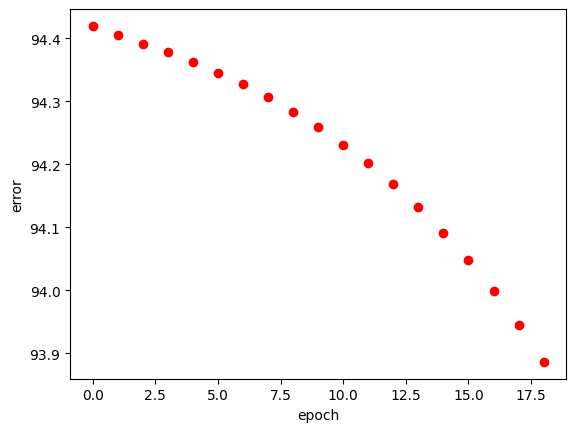

Plotting results


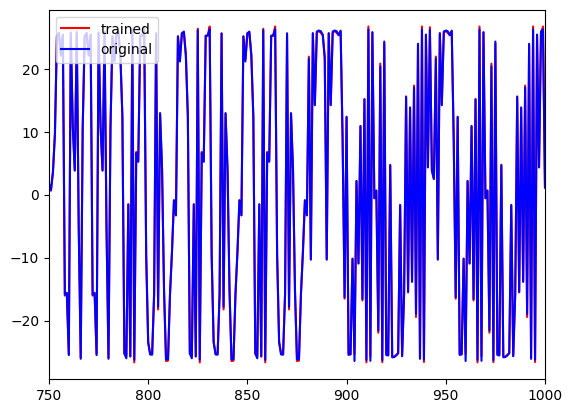

In [10]:

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()


In [17]:
anfis.predict(anf,inputs[0:1])

array([[-0.65859986]])